# Exploratory Data Analysis

---

Types of variables
> Numerical : floor_area_sqm, resale_price, distance to nearest MRT,  distance to nearest mall, schools within 1km, hawkers within 1km, and travel time to RP in minutes

> Categorical : town, flat_type, flat_model 

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
hdbdata = pd.read_csv('df_with_latlong.csv')
hdbdata.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,nearest MRT,distance to nearest MRT,schools within 1km,nearest mall,mall nearest distance,mall within 500m,mall within 1km,hawkers within 1km,LatLong,travel time to RP in minutes
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,...,Ang Mo Kio,1.007304,3,AMK Hub,0.997504,0,1,3,"1.36200453938712,103.853879910407",40
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,...,Ang Mo Kio,1.271398,7,Broadway Plaza,0.868861,0,1,4,"1.37096635222625,103.838201940326",44
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,...,Yio Chu Kang,1.069720,6,Broadway Plaza,1.525573,0,0,2,"1.38070883044887,103.835368226602",50
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,...,Ang Mo Kio,0.946884,3,myVillage At Serangoon Garden,0.893796,0,1,3,"1.3662010408294,103.857200967235",43
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,...,Yio Chu Kang,1.092577,5,Broadway Plaza,1.569307,0,0,2,"1.38104135523576,103.835131742647",47


In [4]:
hdbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148277 entries, 0 to 148276
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   month                         148277 non-null  object 
 1   town                          148277 non-null  object 
 2   flat_type                     148277 non-null  object 
 3   block                         148277 non-null  object 
 4   street_name                   148277 non-null  object 
 5   storey_range                  148277 non-null  object 
 6   floor_area_sqm                148277 non-null  float64
 7   flat_model                    148277 non-null  object 
 8   lease_commence_date           148277 non-null  int64  
 9   remaining_lease               148277 non-null  int64  
 10  resale_price                  148277 non-null  float64
 11  Address                       148277 non-null  object 
 12  Postal code                   148277 non-nul

# Numerical Variables

### We look at the skewness and outliers of each variable. Next, we plot boxplots, histograms and violin plots for each variable to better understand patterns within the data.

In [5]:
hdbNumData = pd.DataFrame(hdbdata[['floor_area_sqm', 'resale_price', 'distance to nearest MRT', 'mall nearest distance', 'hawkers within 1km', 'schools within 1km', 
                                   'travel time to RP in minutes']])
hdbNumData.head()

,floor_area_sqm,resale_price,distance to nearest MRT,mall nearest distance,hawkers within 1km,schools within 1km,travel time to RP in minutes
0,44.0,232000.0,1.007304,0.997504,3,3,40
1,67.0,250000.0,1.271398,0.868861,4,7,44
2,67.0,262000.0,1.069720,1.525573,2,6,50
3,68.0,265000.0,0.946884,0.893796,3,3,43
4,67.0,265000.0,1.092577,1.569307,2,5,47


In [6]:
hdbNumData.skew()

floor_area_sqm                  0.262876
resale_price                    0.976917
distance to nearest MRT         1.086747
mall nearest distance           1.080740
hawkers within 1km              1.408038
schools within 1km              0.355715
travel time to RP in minutes   -0.708407
dtype: float64

In [7]:
# Calculate the quartiles
Q1 = hdbNumData.quantile(0.25)
Q3 = hdbNumData.quantile(0.75)

# Rule to identify outliers
rule = ((hdbNumData < (Q1 - 1.5 * (Q3 - Q1))) | (hdbNumData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

floor_area_sqm                    833
resale_price                     3581
distance to nearest MRT          4474
mall nearest distance            3403
hawkers within 1km              20865
schools within 1km               2126
travel time to RP in minutes     1841
dtype: int64

### 1. floor_area_sqm

In [8]:
floorarea = pd.DataFrame(hdbNumData['floor_area_sqm'])
print("Data type : ", type(floorarea))
print("Data dims : ", floorarea.size)
floorarea.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  148277


,floor_area_sqm
0,44.0
1,67.0
2,67.0
3,68.0
4,67.0


In [9]:
floorarea.describe()

,floor_area_sqm
count,148277.000000
mean,97.574923
std,24.081911
min,31.000000
25%,82.000000
50%,94.000000
75%,113.000000
max,249.000000


<AxesSubplot:>

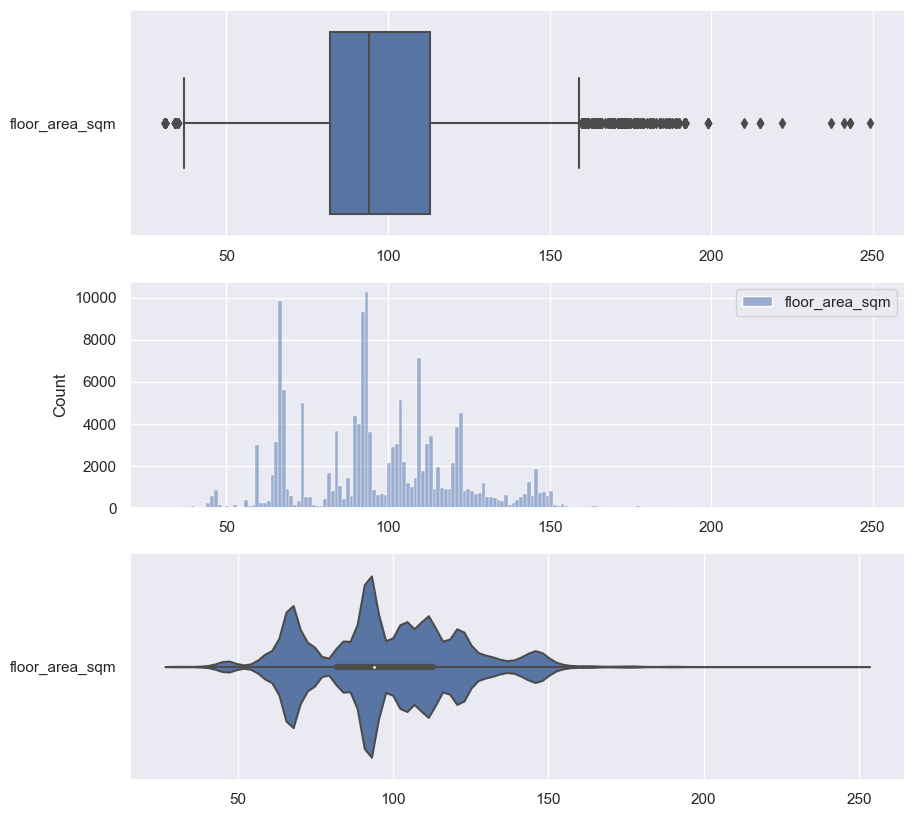

In [10]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(10,10))

# Plot the basic uni-variate figures for floorarea
sb.boxplot(data = floorarea, orient = "h", ax = axes[0])
sb.histplot(data = floorarea, ax = axes[1])
sb.violinplot(data = floorarea, orient = "h", ax = axes[2])

### 2. resale_price

In [11]:
resaleprice = pd.DataFrame(hdbNumData['resale_price'])
print("Data type : ", type(resaleprice))
print("Data dims : ", resaleprice.size)
resaleprice.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  148277


,resale_price
0,232000.0
1,250000.0
2,262000.0
3,265000.0
4,265000.0


In [12]:
resaleprice.describe()

,resale_price
count,1.482770e+05
mean,4.790543e+05
std,1.657407e+05
min,1.400000e+05
25%,3.580000e+05
50%,4.500000e+05
75%,5.680000e+05
max,1.418000e+06


<AxesSubplot:>

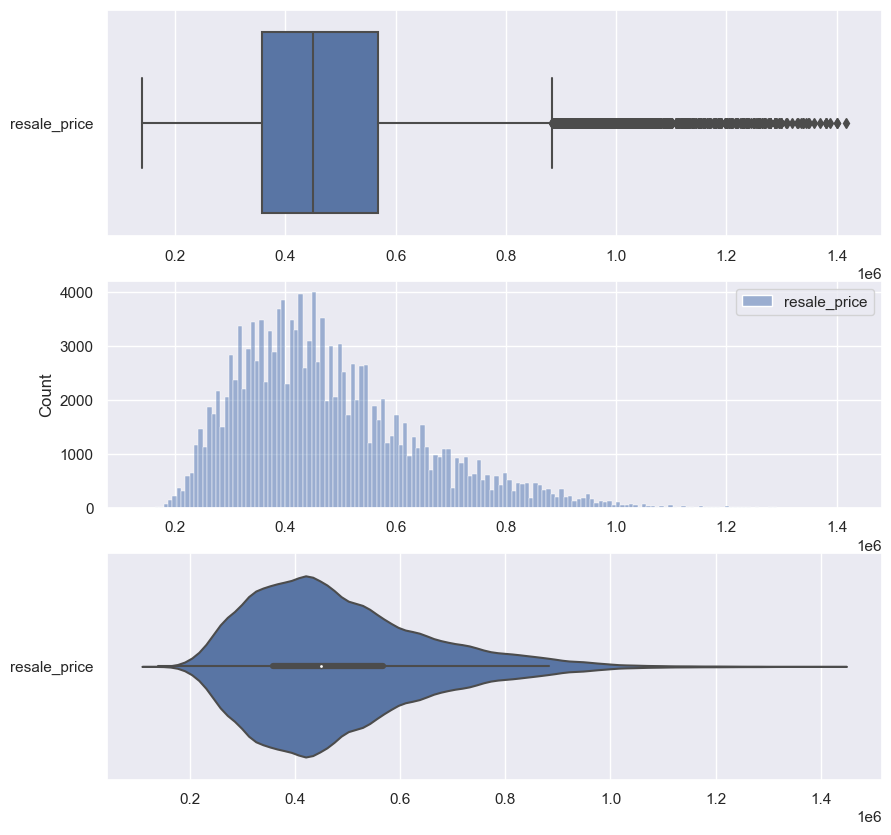

In [13]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(10,10))

# Plot the basic uni-variate figures for floorarea
sb.boxplot(data = resaleprice, orient = "h", ax = axes[0])
sb.histplot(data = resaleprice, ax = axes[1])
sb.violinplot(data = resaleprice, orient = "h", ax = axes[2])

### 3. distance to nearest MRT

#### Most of the flats are conveniently located near the MRT, as the average distance to the nearest MRT is of walking distance of 0.655km.

In [14]:
distToMRT = pd.DataFrame(hdbNumData['distance to nearest MRT'])
print("Data type : ", type(distToMRT))
print("Data dims : ", distToMRT.size)
distToMRT.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  148277


,distance to nearest MRT
0,1.007304
1,1.271398
2,1.069720
3,0.946884
4,1.092577


In [15]:
distToMRT.describe()

,distance to nearest MRT
count,148277.000000
mean,0.655203
std,0.425408
min,0.002224
25%,0.326404
50%,0.563131
75%,0.875608
max,3.634699


<AxesSubplot:>

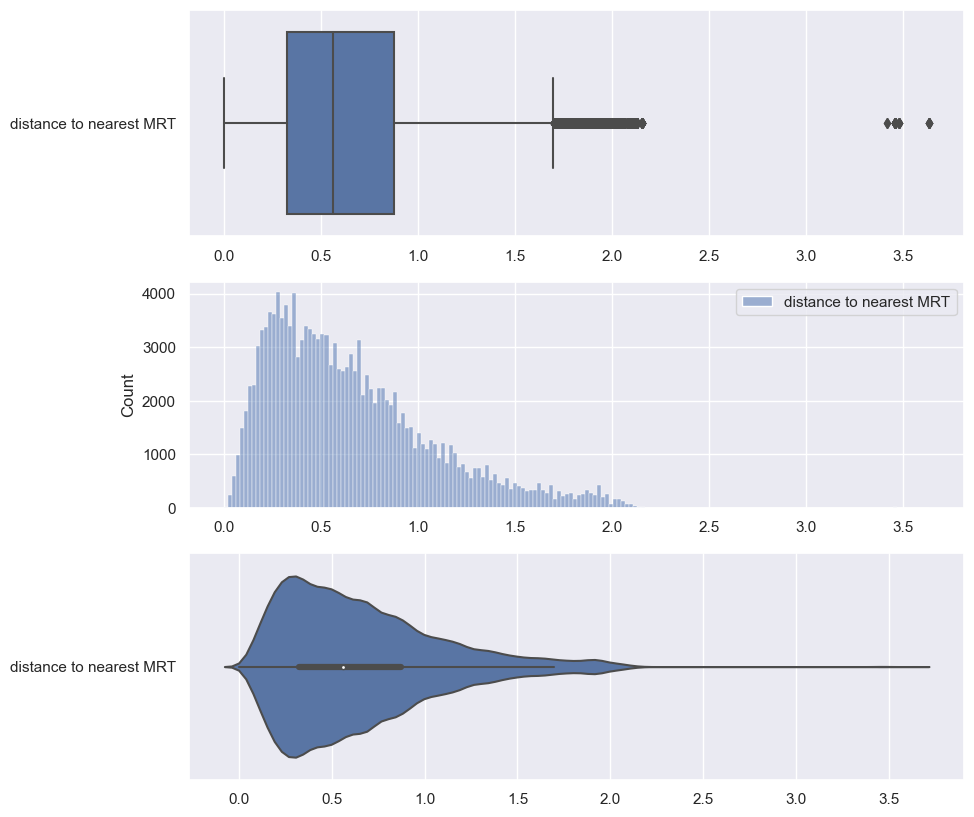

In [16]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(10,10))

# Plot the basic uni-variate figures for floorarea
sb.boxplot(data = distToMRT, orient = "h", ax = axes[0])
sb.histplot(data = distToMRT, ax = axes[1])
sb.violinplot(data = distToMRT, orient = "h", ax = axes[2])

### 4. distance to nearest mall

#### Most of the flats are conveniently located near a mall, as the average distance to the nearest mall is of walking distance of 0.673km.

In [17]:
distToMall = pd.DataFrame(hdbNumData['mall nearest distance'])
print("Data type : ", type(distToMall))
print("Data dims : ", distToMall.size)
distToMall.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  148277


,mall nearest distance
0,0.997504
1,0.868861
2,1.525573
3,0.893796
4,1.569307


In [18]:
distToMall.describe()

,mall nearest distance
count,1.482770e+05
mean,6.727853e-01
std,3.827278e-01
min,1.860000e-09
25%,3.889378e-01
50%,6.044759e-01
75%,8.867143e-01
max,4.009099e+00


<AxesSubplot:>

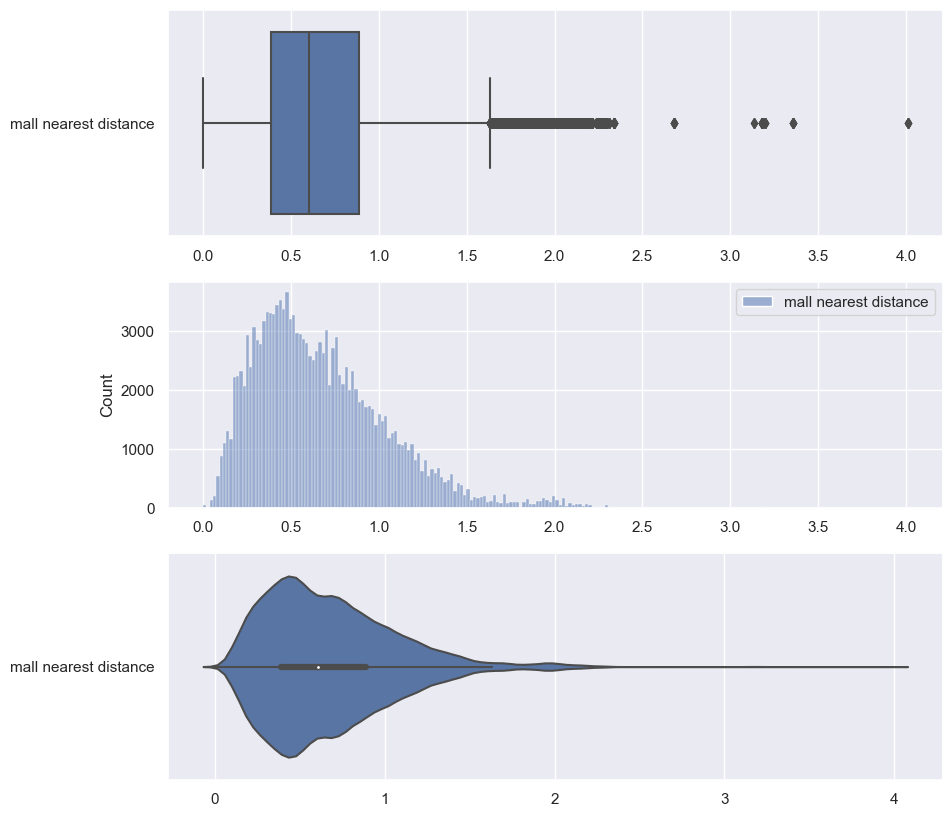

In [19]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(10,10))

# Plot the basic uni-variate figures for floorarea
sb.boxplot(data = distToMall, orient = "h", ax = axes[0])
sb.histplot(data = distToMall, ax = axes[1])
sb.violinplot(data = distToMall, orient = "h", ax = axes[2])

### 5. schools within 1km

#### Most of the flats are conveniently located near schools, as the average number of schools within 1km is around 5 to 6 schools.

In [20]:
noOfschools = pd.DataFrame(hdbNumData['schools within 1km'])
print("Data type : ", type(noOfschools))
print("Data dims : ", noOfschools.size)
noOfschools.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  148277


,schools within 1km
0,3
1,7
2,6
3,3
4,5


In [21]:
noOfschools.describe()

,schools within 1km
count,148277.000000
mean,5.527202
std,2.522944
min,0.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,16.000000


<AxesSubplot:>

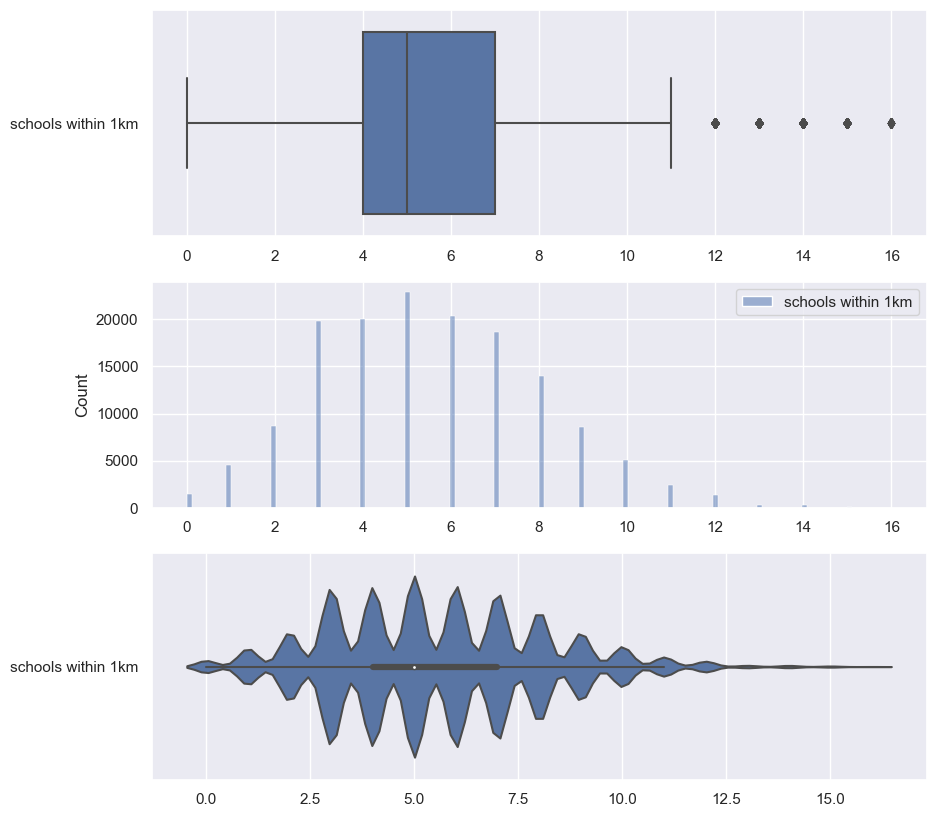

In [22]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(10,10))

# Plot the basic uni-variate figures for floorarea
sb.boxplot(data = noOfschools, orient = "h", ax = axes[0])
sb.histplot(data = noOfschools, ax = axes[1])
sb.violinplot(data = noOfschools, orient = "h", ax = axes[2])

### 6. hawkers within 1km

#### Most of the flats are conveniently located near hawkers, as the average number of hawkers within 1km is around 1 to 2 hawkers. Although the number is quite small, each hawker centre has many food options available and can accommodate many diners.

In [23]:
noOfhawkers = pd.DataFrame(hdbNumData['hawkers within 1km'])
print("Data type : ", type(noOfhawkers))
print("Data dims : ", noOfhawkers.size)
noOfhawkers.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  148277


,hawkers within 1km
0,3
1,4
2,2
3,3
4,2


In [24]:
noOfhawkers.describe()

,hawkers within 1km
count,148277.000000
mean,1.548952
std,1.589884
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


<AxesSubplot:>

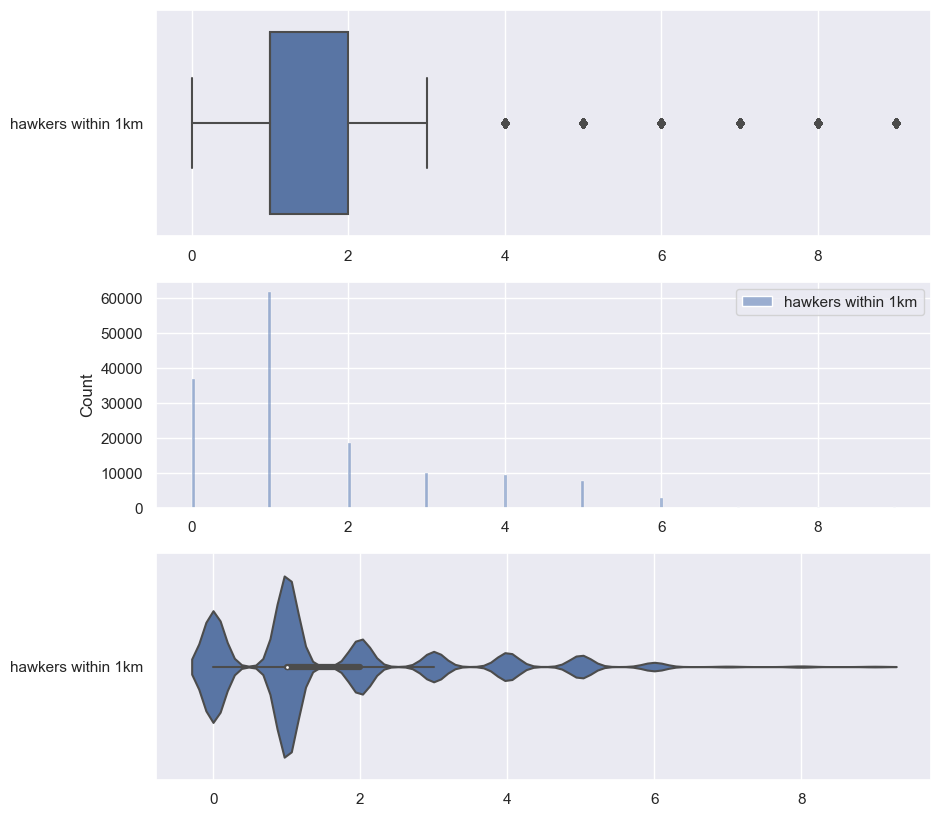

In [25]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(10,10))

# Plot the basic uni-variate figures for floorarea
sb.boxplot(data = noOfhawkers, orient = "h", ax = axes[0])
sb.histplot(data = noOfhawkers, ax = axes[1])
sb.violinplot(data = noOfhawkers, orient = "h", ax = axes[2])

### 7. travel time to RP in minutes

#### The minimum travel time to Raffles Place MRT is 9 min, while the maximum is 76 min. It is posssible that resale prices might be higher for flats near Raffles Place, which is the central business district, as people might want to save time travelling to work everyday.

In [26]:
timetoRP = pd.DataFrame(hdbNumData['travel time to RP in minutes'])
print("Data type : ", type(timetoRP))
print("Data dims : ", timetoRP.size)
timetoRP.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  148277


,travel time to RP in minutes
0,40
1,44
2,50
3,43
4,47


In [27]:
timetoRP.describe()

,travel time to RP in minutes
count,148277.000000
mean,48.040505
std,10.633175
min,9.000000
25%,42.000000
50%,50.000000
75%,56.000000
max,76.000000


<AxesSubplot:>

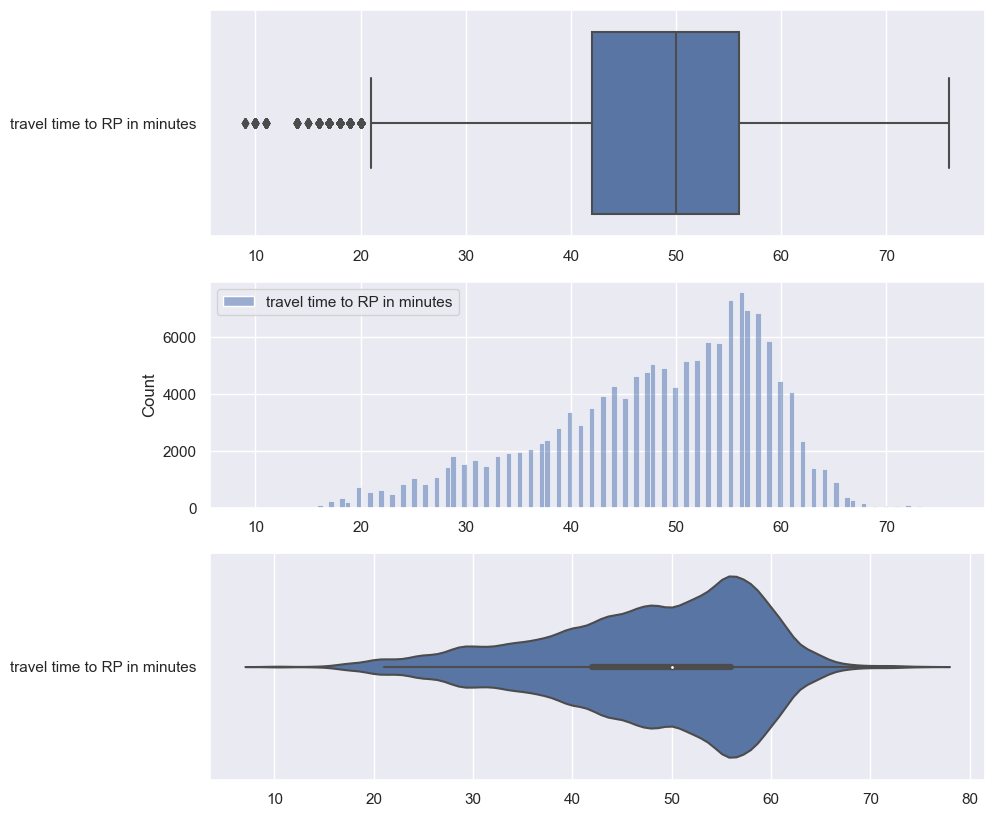

In [28]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(10,10))

# Plot the basic uni-variate figures for floorarea
sb.boxplot(data = timetoRP, orient = "h", ax = axes[0])
sb.histplot(data = timetoRP, ax = axes[1])
sb.violinplot(data = timetoRP, orient = "h", ax = axes[2])

# Categorical Variables

#### For categorical variables, we looked at the univariate statistics using a barchart, followed by plotting a box plot of resale price against each categorical variable to look at the possible relationship between them.

In [29]:
hdbCatData = pd.DataFrame(hdbdata[['town', 'flat_type', 'flat_model']])
hdbCatData.head()

,town,flat_type,flat_model
0,ANG MO KIO,2 ROOM,Improved
1,ANG MO KIO,3 ROOM,New Generation
2,ANG MO KIO,3 ROOM,New Generation
3,ANG MO KIO,3 ROOM,New Generation
4,ANG MO KIO,3 ROOM,New Generation


In [30]:
hdbCatData = hdbCatData.astype('category')
hdbCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148277 entries, 0 to 148276
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   town        148277 non-null  category
 1   flat_type   148277 non-null  category
 2   flat_model  148277 non-null  category
dtypes: category(3)
memory usage: 436.8 KB


In [31]:
hdbCatData.describe()

,town,flat_type,flat_model
count,148277,148277,148277
unique,26,7,21
top,SENGKANG,4 ROOM,Model A
freq,12490,61961,49785


### 1. town

#### From the boxplot, the town with the highest median resale price is Queenstown, while the town with the lowest is Ang Mo Kio.

In [32]:
hdbCatData["town"].value_counts()

SENGKANG           12490
PUNGGOL            10909
WOODLANDS          10321
YISHUN             10162
TAMPINES            9968
JURONG WEST         9827
BEDOK               7989
HOUGANG             7281
CHOA CHU KANG       6810
ANG MO KIO          6191
BUKIT MERAH         5690
BUKIT PANJANG       5678
BUKIT BATOK         4980
TOA PAYOH           4748
PASIR RIS           4574
KALLANG/WHAMPOA     4459
QUEENSTOWN          4215
GEYLANG             3680
SEMBAWANG           3677
CLEMENTI            3394
JURONG EAST         3093
BISHAN              2807
SERANGOON           2763
CENTRAL AREA        1237
MARINE PARADE        948
BUKIT TIMAH          386
Name: town, dtype: int64

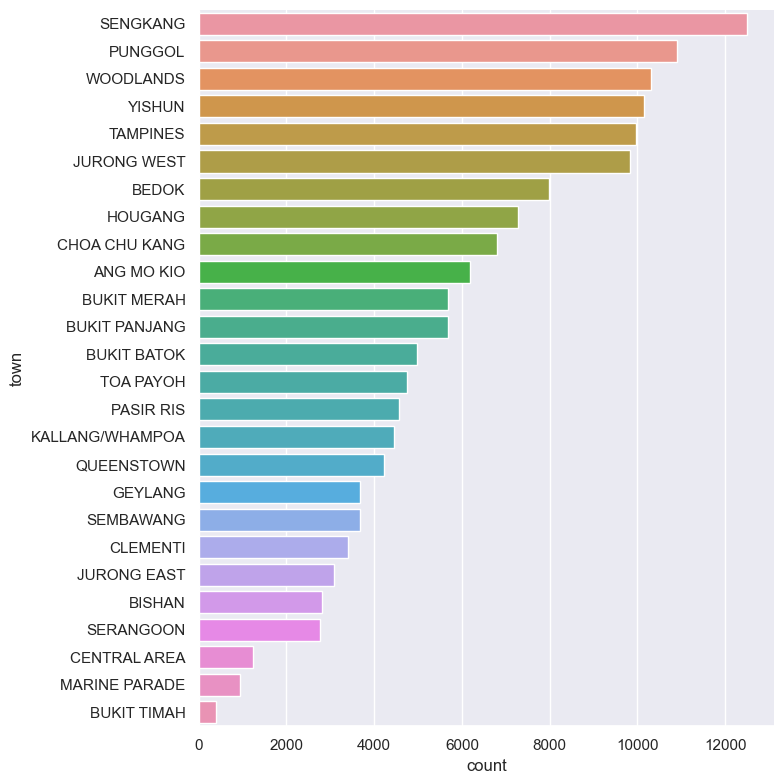

In [33]:
# Modified catplot for counts sorted by the counts
sb.catplot(y = 'town', data = hdbCatData, 
           kind = "count", 
           height = 8, 
           order = hdbCatData['town'].value_counts().index)

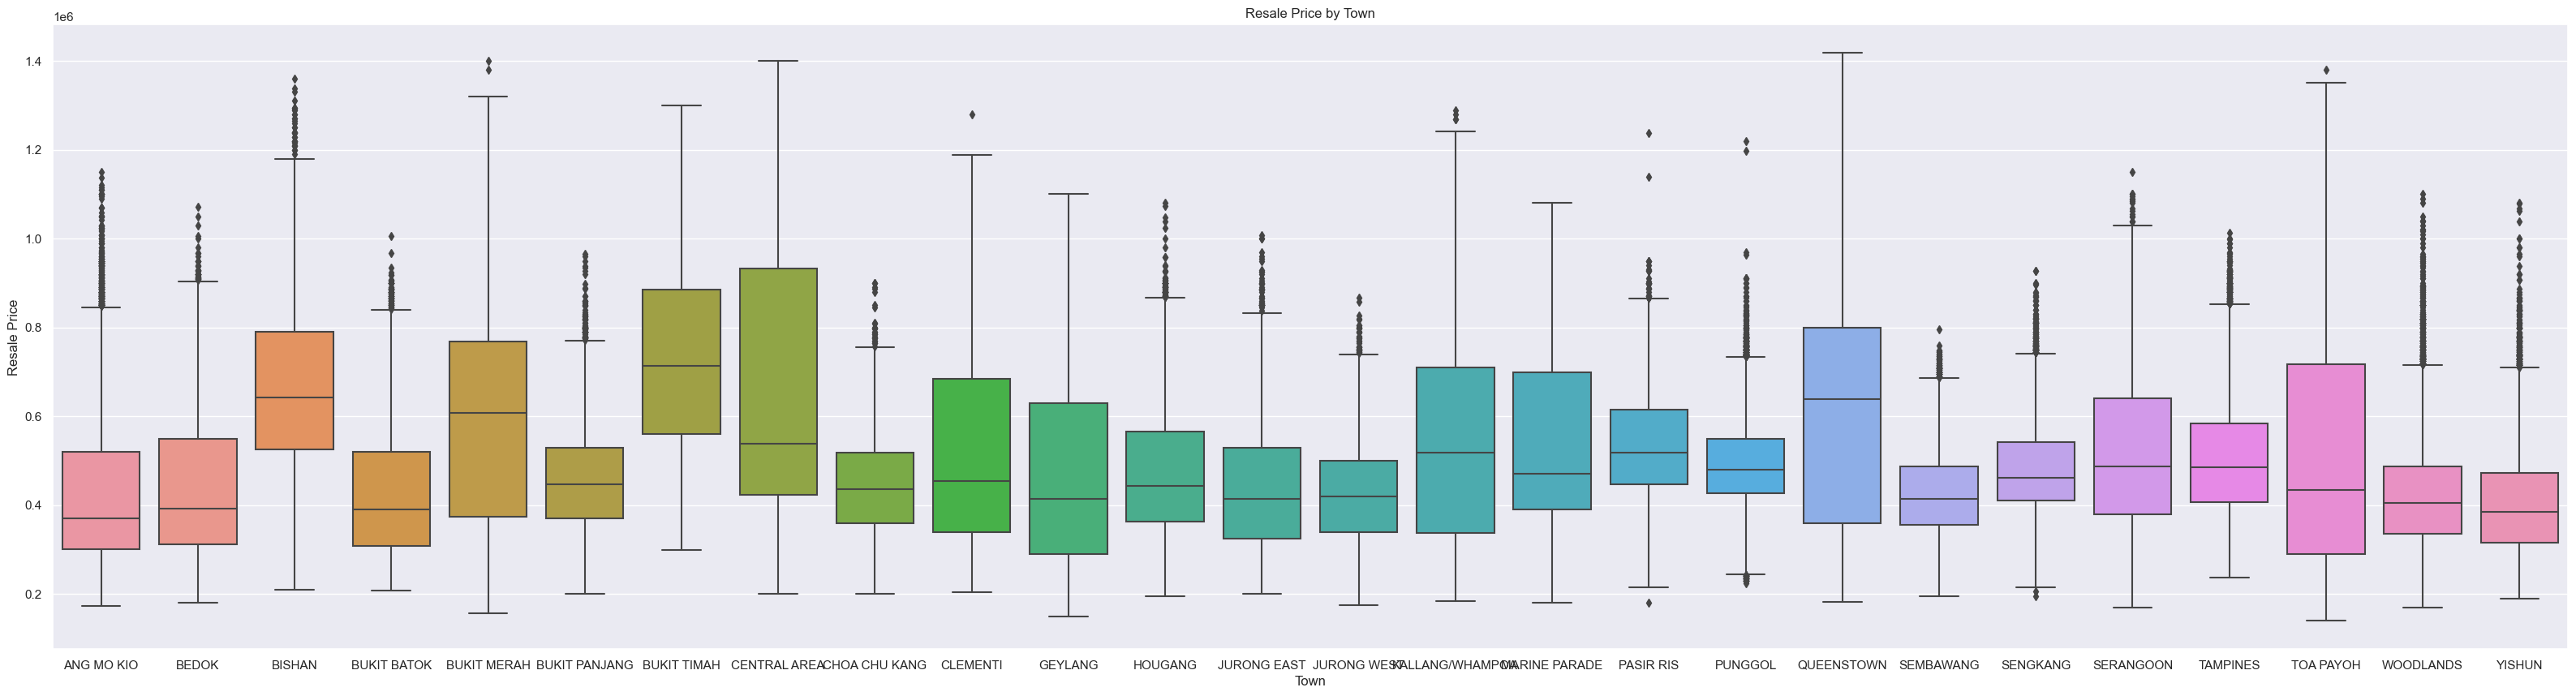

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 10))

# create the box plot
sns.boxplot(x='town', y='resale_price', data=hdbdata)

# add labels and title
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.title('Resale Price by Town')

# show the plot
plt.show()

### 2. flat_type

#### From the boxplot, as expected, the median resale price increases with the size of the flat, which varies from the different flat types.

In [35]:
hdbCatData["flat_type"].value_counts()

4 ROOM              61961
5 ROOM              37514
3 ROOM              34871
EXECUTIVE           11487
2 ROOM               2313
MULTI-GENERATION       72
1 ROOM                 59
Name: flat_type, dtype: int64

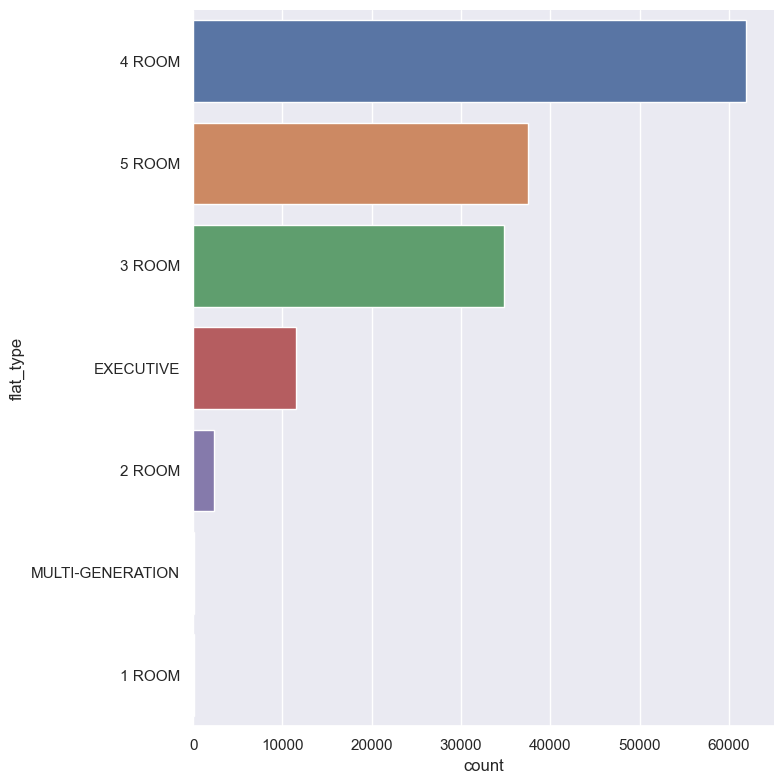

In [36]:
# Modified catplot for counts sorted by the counts
sb.catplot(y = 'flat_type', data = hdbCatData, 
           kind = "count", 
           height = 8, 
           order = hdbCatData['flat_type'].value_counts().index)

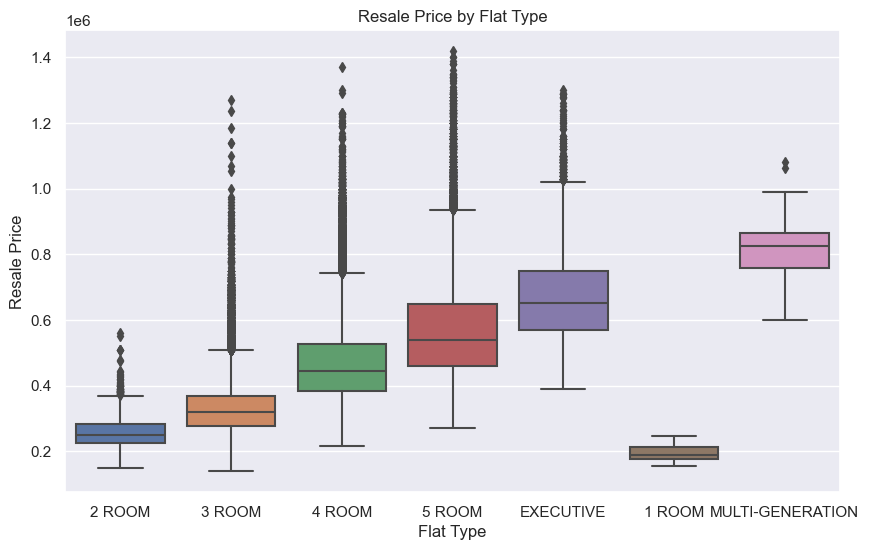

In [51]:
plt.figure(figsize=(10, 6))

# create the box plot
sns.boxplot(x='flat_type', y='resale_price', data=hdbdata)

# add labels and title
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.title('Resale Price by Flat Type')

# show the plot
plt.show()

### 3. flat_model

#### From the boxplot, the flat model with the highest median resale price is Type S2 flats, while the model with the lowest is 2-room flats.

In [37]:
hdbCatData["flat_model"].value_counts()

Model A                   49785
Improved                  36926
New Generation            18728
Premium Apartment         17067
Simplified                 5798
Apartment                  5778
Maisonette                 4361
Standard                   4173
DBSS                       2669
Model A2                   1708
Model A-Maisonette          271
Adjoined flat               265
Type S1                     263
Type S2                     151
Premium Apartment Loft       91
Terrace                      88
Multi Generation             72
2-room                       41
Improved-Maisonette          21
Premium Maisonette           14
3Gen                          7
Name: flat_model, dtype: int64

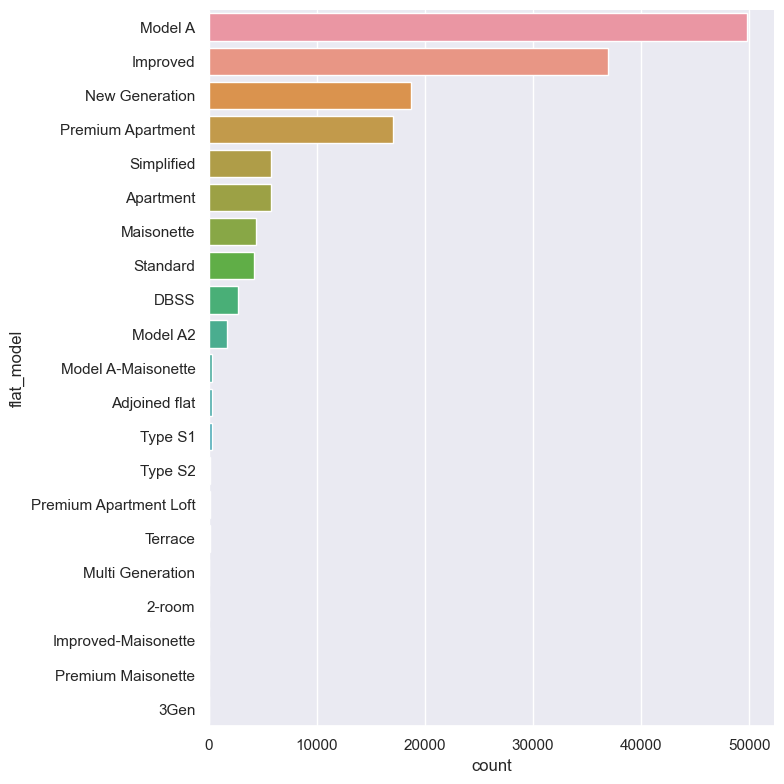

In [38]:
# Modified catplot for counts sorted by the counts
sb.catplot(y = 'flat_model', data = hdbCatData, 
           kind = "count", 
           height = 8, 
           order = hdbCatData['flat_model'].value_counts().index)

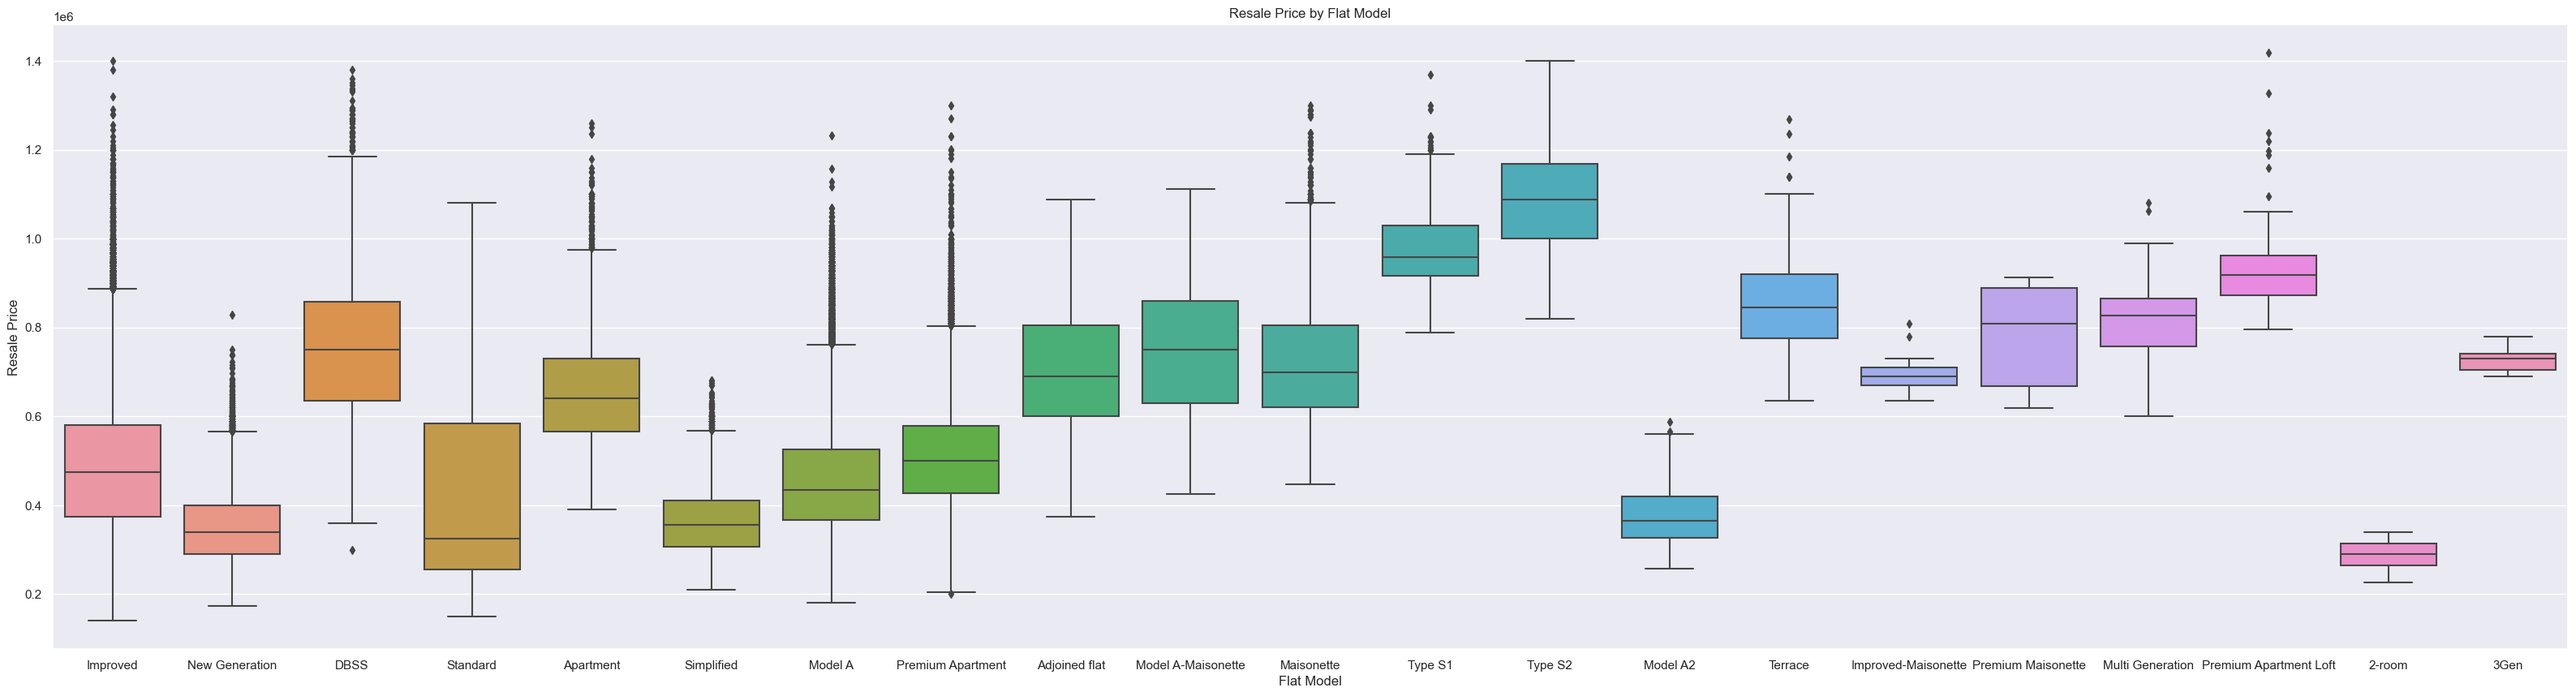

In [54]:
plt.figure(figsize=(40, 10))

# create the box plot
sns.boxplot(x='flat_model', y='resale_price', data=hdbdata)

# add labels and title
plt.xlabel('Flat Model')
plt.ylabel('Resale Price')
plt.title('Resale Price by Flat Model')

# show the plot
plt.show()